# 2. Statistics
After **PreProcessing** we will now look at chords and their occurences in the dataset, as well as discuss them.

In [18]:
import json
def load_from_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

all_chords = load_from_json('data/processed/chords.json')

### Musical Piece lenghs
How are the lenghts of our pices?

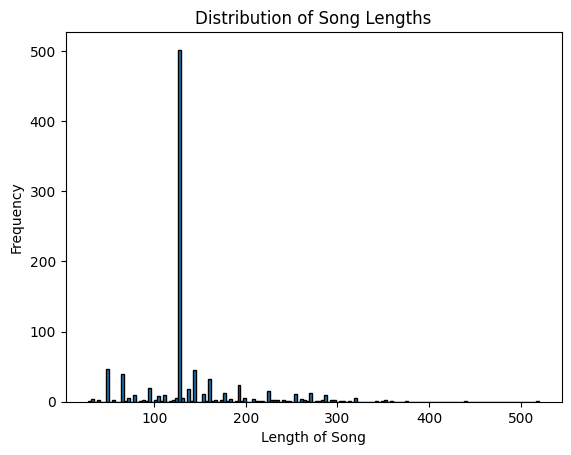

139.4154175588865

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

# Calculate lengths of the inner lists
lengths = [len(lst) for lst in all_chords]

# Plot histogram
plt.hist(lengths, bins='auto', edgecolor='black')
plt.title('Distribution of Song Lengths')
plt.xlabel('Length of Song')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('foo.png')

np.mean(lengths)

Dataset Description:

- Total number of songs in the dataset.
- Average, minimum, and maximum length of chord progressions.

In [20]:
def analyze_chord_progressions(all_chords):
    # Total number of songs (chord progressions)
    total_songs = len(all_chords)

    # Calculating lengths of all chord progressions
    progression_lengths = [len(chord_progression) for chord_progression in all_chords]

    # Average, minimum, and maximum length of chord progressions
    avg_length = sum(progression_lengths) / total_songs
    min_length = min(progression_lengths)
    max_length = max(progression_lengths)

    return total_songs, avg_length, min_length, max_length


total_songs, avg_length, min_length, max_length = analyze_chord_progressions(all_chords)
print(f"Total songs: {total_songs}")
print(f"Average length of chord progressions: {avg_length}")
print(f"Minimum length of chord progressions: {min_length}")
print(f"Maximum length of chord progressions: {max_length}")

Total songs: 934
Average length of chord progressions: 139.4154175588865
Minimum length of chord progressions: 28
Maximum length of chord progressions: 520


### Chord Counts
Now lets look at some simple Counts from all chords. 

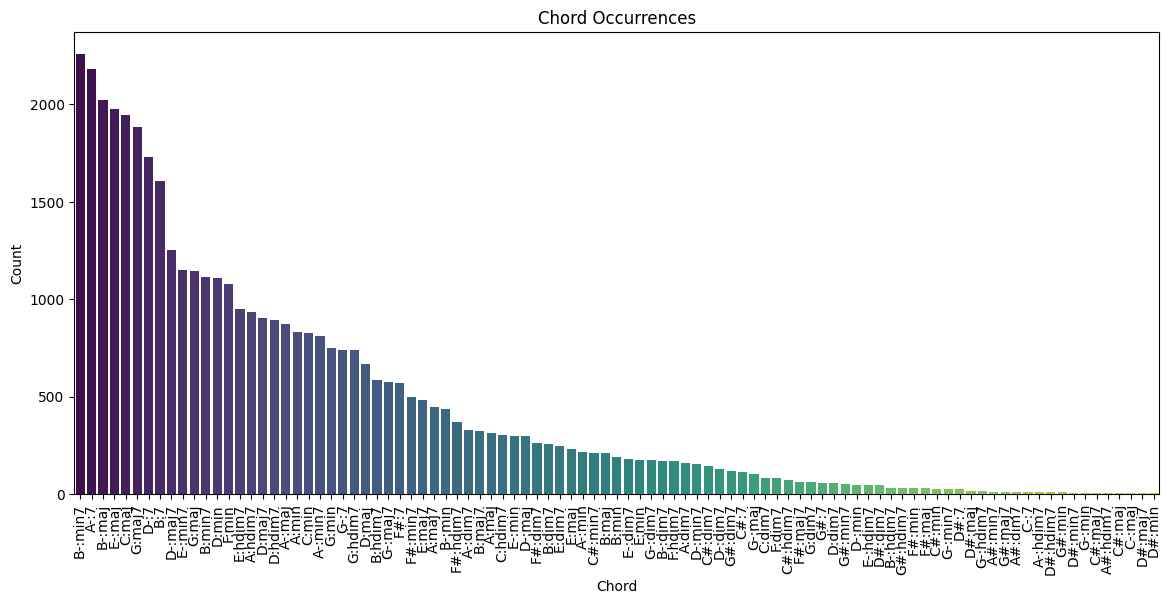

In [21]:
# Assuming your 2D list is named chords
# Flattening the list
flat_list = [item for sublist in all_chords for item in sublist]

# Transforming the list into a DataFrame
df = pd.DataFrame(flat_list, columns=['Chord'])

# Counting the occurrences of each chord
chord_counts = df['Chord'].value_counts()

# Bar plot of chord occurrences
plt.figure(figsize=(14, 6))
sns.barplot(x=chord_counts[20:].index, y=chord_counts[20:].values, palette="viridis")
plt.title('Chord Occurrences')
plt.xlabel('Chord')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.savefig('img/ChordOccurrences.png')
plt.show()

### Chord Counts: Classes
Only count the class. The classes are as follows:    
- ':7' - Dominant 7 chords (e.g., C7, A7)
- ':maj7' - Major 7 chords (e.g., Cmaj7, Amaj7)
- ':min7' - Minor 7 chords (e.g., Cmin7, Amin7)
- 'min' - Minor triads (e.g., Cmin, Amin)
- 'maj' - In the dataset, thy have no suffix

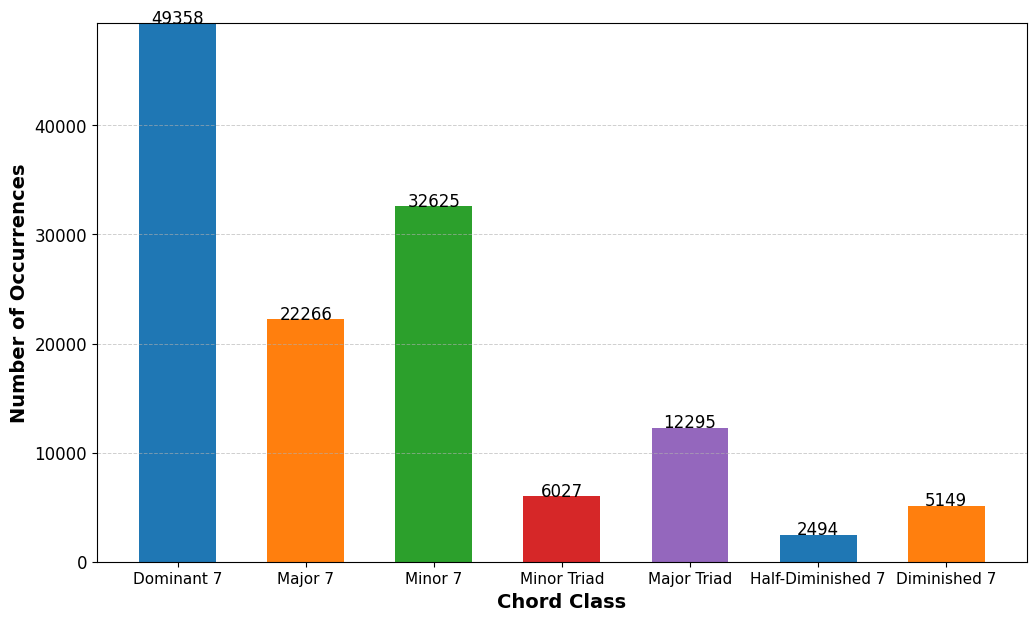

{'Dominant 7': 49358, 'Major 7': 22266, 'Minor 7': 32625, 'Minor Triad': 6027, 'Major Triad': 12295, 'Diminished 7': 2494, 'Half-Diminished 7': 5149}


In [26]:
chord_classes = {
    ':7': "Dominant 7",
    ':maj7': "Major 7",
    ':min7': "Minor 7",
    'min': "Minor Triad",
    'maj': "Major Triad",
    'hdim7': "Half-Diminished 7",
    'dim7': "Diminished 7",
}

chord_class_counts = {
    "Dominant 7": 0,
    "Major 7": 0,
    "Minor 7": 0,
    "Minor Triad": 0,
    "Major Triad": 0,
    "Diminished 7": 0,
    "Half-Diminished 7": 0
    
}

for chord_list in all_chords:
    for chord in chord_list:
        classified = False
        for suffix, chord_class in chord_classes.items():
            if suffix in chord:
                chord_class_counts[chord_class] += 1
                classified = True
                break
        if not classified:  # this means it's a Major triad (e.g., "C" is "C:maj")
            raise ValueError(chord)
            # chord_class_counts["Major Triad"] += 1


plt.figure(figsize=(12,7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Bar plotting with enhanced color and width
bars = plt.bar(chord_classes.values(), list(chord_class_counts.values()), color=colors, width=0.6)

# Adding subtle gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Adjusting font size and weight for clarity
plt.xlabel('Chord Class', fontsize=14, fontweight='bold')
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=12)
#plt.title('Chord Class Occurrences by Class', fontsize=16, fontweight='bold', pad=20)

# Bar Labeling: Adding labels above bars for exact counts with better positioning
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 3, str(height), ha='center', fontsize=12)

# Adjusting the y limit for better visualization
plt.ylim(0, max(chord_class_counts.values()) + 50)
plt.savefig("img/ChordOccurencesbyClass.png")
plt.show()

print(chord_class_counts)

### Chord Progression Analysis

#### 1. Extract Unique Chords in Order

The function `extract_unique_chords_in_order(chord_sequence)` extracts the unique chords from a sequence in the order they appear. This process helps identify chords that change within a measure or across measures.

For instance:
Given the sequence $[E\text{:min}, E\text{:min}, A\text{:min}, A\text{:min}]$, the function will return $[E\text{:min}, A\text{:min}]$.

#### 2. Identify Transitions

The function `identify_transitions(all_chords, number_of_transitions=2)` identifies the chord transitions based on the specified number of transitions. This function works by:

- Iterating through each chord sequence in the dataset.
- Extracting unique ordered chords from the sequence.
- Capturing transitions based on the desired number of chords (pairs, triads, etc.).
- For capturing transitions like $E\text{:min} \to E\text{:min}$ (when a chord spans more than one measure and is followed by the same chord), the last chord is appended again to the sequence of unique ordered chords.

For example:
Given the sequence $[E\text{:min}, E\text{:min}, E\text{:min}, E\text{:min}]$, with `number_of_transitions=2`, the function will capture the transition $E\text{:min} \to E\text{:min}$.

#### 3. Top Chord Progressions

The function `top_chord_progressions(all_chords, number_of_transitions=2)` captures the top chord progressions by:

- Identifying all transitions in the dataset using the above functions.
- Counting occurrences of each progression.
- Returning the top 10 most common progressions.

For example:
Given sequences like $[E\text{:min}, E\text{:min}, E\text{:min}, E\text{:min}]$ and $[E\text{:min}, A\text{:min}, C\text{:min}, F\text{:min}]$, and `number_of_transitions=2`, the function will return transitions like $E\text{:min} \to E\text{:min}$, $E\text{:min} \to A\text{:min}$, etc.

In [34]:
from collections import Counter

def extract_unique_chords_in_order(chord_sequence):
    """Extract unique chords in order from the sequence"""
    unique_ordered_chords = []
    prev_chord = None
    for chord in chord_sequence:
        if chord != prev_chord:
            unique_ordered_chords.append(chord)
            prev_chord = chord
    return unique_ordered_chords

def identify_transitions(all_chords, number_of_transitions=2):
    """Identify chord transitions from the dataset with a specified number of transitions"""
    transitions = []

    for chord_sequence in all_chords:
        unique_ordered_chords = extract_unique_chords_in_order(chord_sequence)
        
        # Handling the case where a chord spans more than one measure and is followed by the same chord
        extended_chords = unique_ordered_chords + [unique_ordered_chords[-1]]  # Append the last chord again
        
        for i in range(len(extended_chords) - number_of_transitions + 1):  # Adjusted for the desired number of transitions
            transition = tuple(extended_chords[i:i+number_of_transitions])
            transitions.append(transition)

    return transitions

def top_chord_progressions(all_chords, top_k=10, number_of_transitions=2):
    """Get the top chord progressions with a specified number of transitions"""
    transitions = identify_transitions(all_chords, number_of_transitions)
    transition_counts = Counter(transitions)
    return transition_counts.most_common(top_k)



# Test the modified function with the provided dataset examples for pairs and triads
top_progressions_pairs = top_chord_progressions(all_chords, 10)
top_progressions_triads = top_chord_progressions(all_chords, 10, 3)

# with test data
all_chords_test = [['E:min', 'E:min', 'E:min', 'E:min', 'E:min', 'E:min', 'E:min', 'E:min'], 
                   ['E:min', 'A:min', 'C:min', 'F:min']]
# top_progressions_pairs = top_chord_progressions(all_chords_test, 2)
# top_progressions_triads = top_chord_progressions(all_chords_test, 3)


top_progressions_pairs, top_progressions_triads

([(('G:min7', 'C:7'), 1400),
  (('D:min7', 'G:7'), 1110),
  (('F:min7', 'B-:7'), 1044),
  (('C:min7', 'F:7'), 850),
  (('A:min7', 'D:7'), 824),
  (('B-:7', 'E-:maj7'), 629),
  (('C:7', 'F:maj7'), 601),
  (('B-:min7', 'E-:7'), 551),
  (('D:7', 'G:min7'), 539),
  (('A:7', 'D:min7'), 511)],
 [(('G:min7', 'C:7', 'F:maj7'), 450),
  (('F:min7', 'B-:7', 'E-:maj7'), 449),
  (('D:7', 'G:min7', 'C:7'), 339),
  (('D:min7', 'G:7', 'C:maj7'), 307),
  (('A:7', 'D:min7', 'G:7'), 302),
  (('C:min7', 'F:7', 'B-:maj7'), 290),
  (('C:7', 'F:min7', 'B-:7'), 288),
  (('B-:min7', 'E-:7', 'A-:maj7'), 283),
  (('G:min7', 'C:7', 'F:maj'), 253),
  (('G:7', 'C:min7', 'F:7'), 226)])

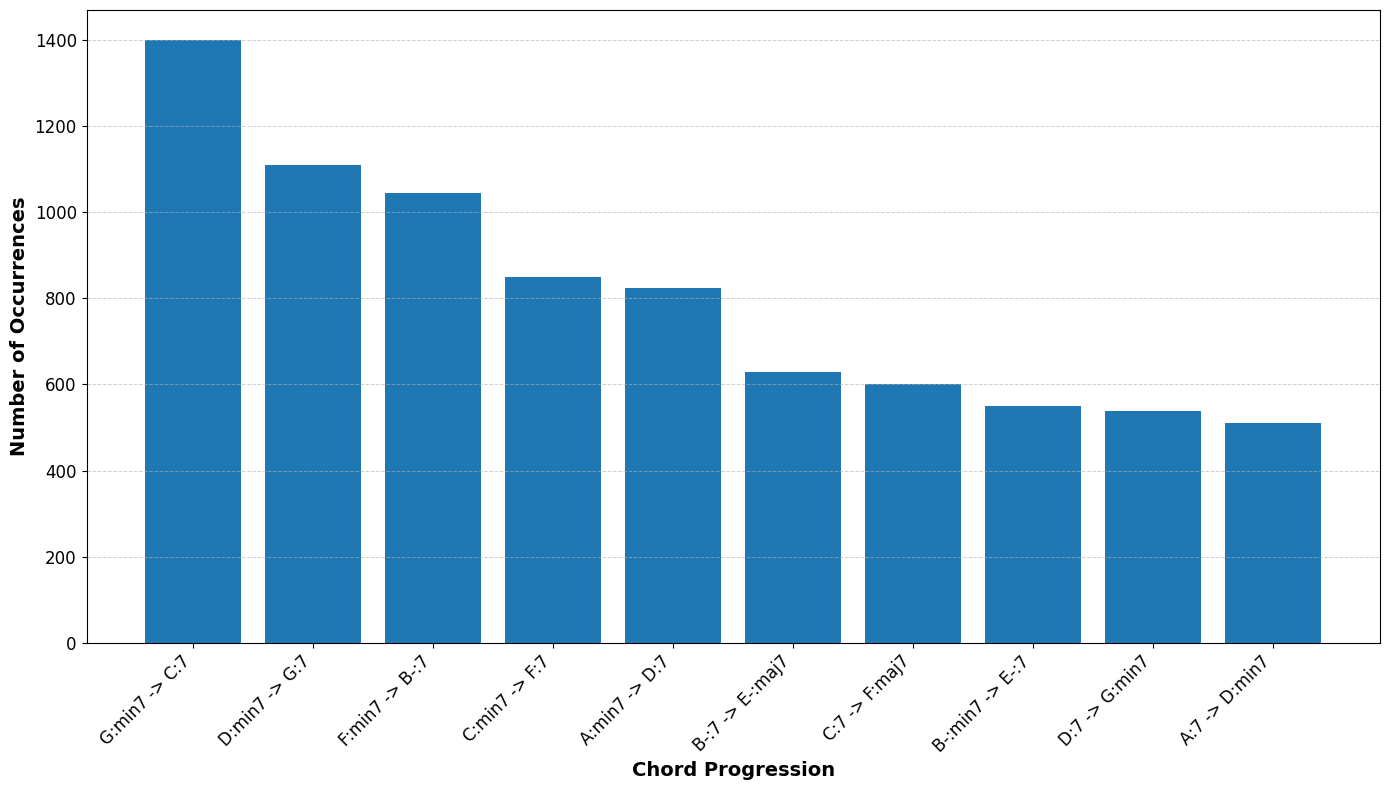

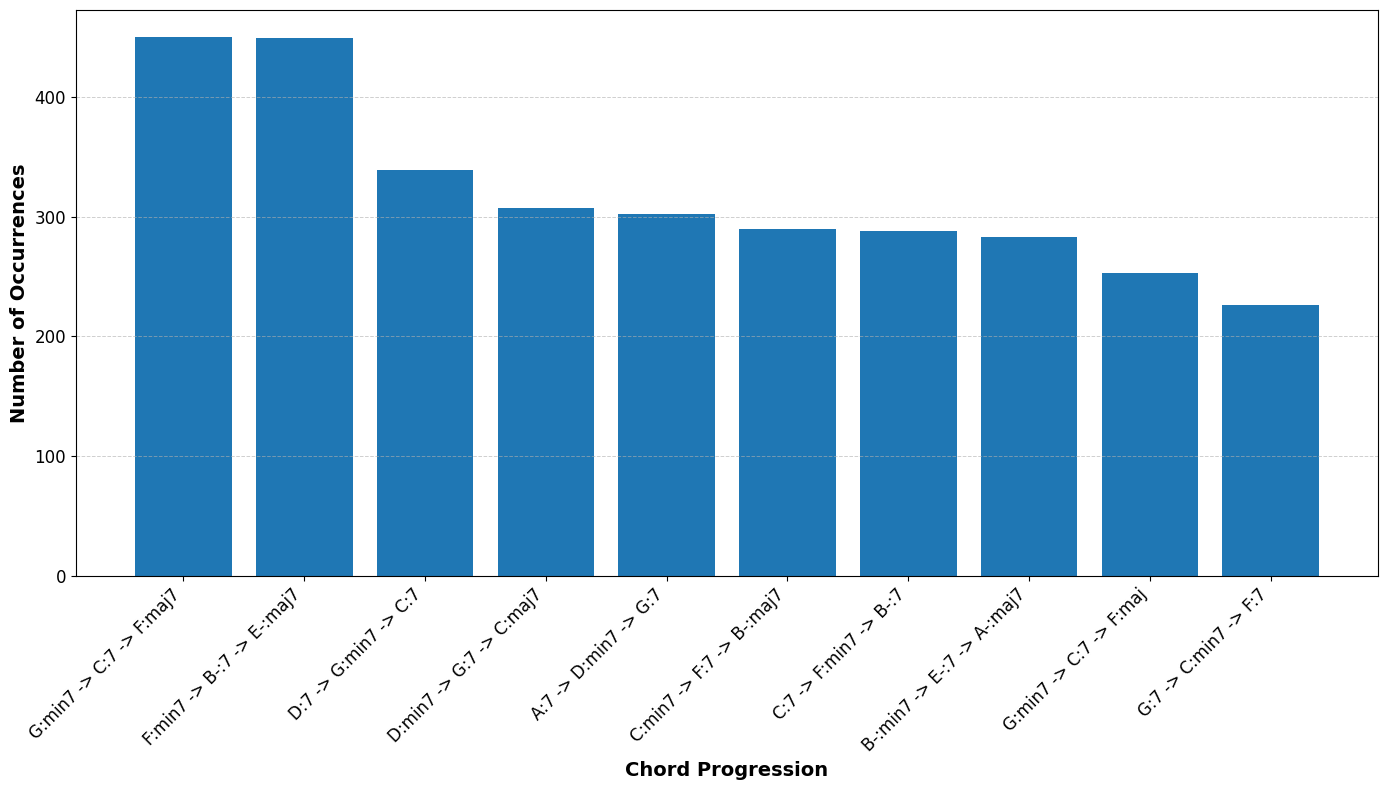

In [35]:
def plot_top_chord_progressions(top_progressions, number_of_transitions, savename):
    """Plot the top chord progressions using a bar chart with improved layout"""
    
    # Extracting chords and their counts
    chords, counts = zip(*top_progressions)
    
    # Convert the tuple sequences to string for x-axis labels
    chord_labels = [' -> '.join(chord) for chord in chords]
    
    # Plotting with an adjusted figure size
    plt.figure(figsize=(14,8))
    bars = plt.bar(chord_labels, counts, color='#1f77b4')
    
    # Adding gridlines, labels, and title
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
    plt.xlabel(f'Chord Progression', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12, rotation=45, ha="right")
    plt.yticks(fontsize=12)
    #plt.title(f'Top {number_of_transitions}-Chord Progressions in the Dataset', fontsize=16, fontweight='bold', pad=20)
    
    
    # Using subplots_adjust instead of tight_layout to provide padding
    plt.tight_layout()
    plt.savefig(f"img/{savename}.png")
    plt.show()

# Plotting for pairs and triads using the modified function
plot_top_chord_progressions(top_progressions_pairs, 2, "Top5ChordProgressions")
plot_top_chord_progressions(top_progressions_triads, 3, "Top3ChordProgressions")

### Chord Transitions Heatmap


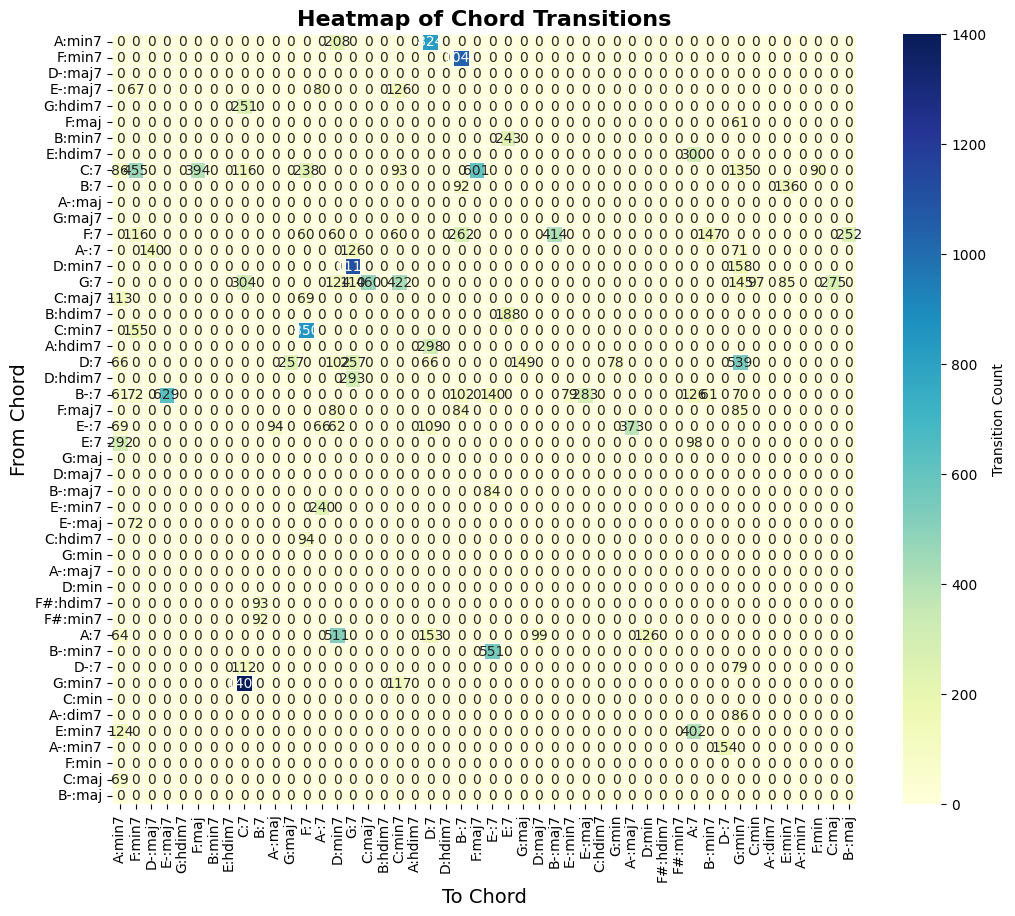

In [36]:
import seaborn as sns
import pandas as pd

transitions_pairs = top_chord_progressions(all_chords, 100, 2)
# Extract unique chords from the transitions
unique_chords = list(set([chord for transition, _ in transitions_pairs for chord in transition]))

# Create a DataFrame initialized with zeros
transition_matrix = pd.DataFrame(0, index=unique_chords, columns=unique_chords)

# Populate the DataFrame with transition counts
for transition, count in transitions_pairs:
    from_chord, to_chord = transition
    transition_matrix.at[from_chord, to_chord] = count

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(transition_matrix, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Transition Count'})
plt.title("Heatmap of Chord Transitions", fontsize=16, fontweight='bold')
plt.xlabel("To Chord", fontsize=14)
plt.ylabel("From Chord", fontsize=14)
plt.show()


# Chord Saving
Save chords to file `chords.data` in a json like format.

In [13]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
import numpy as np
import json

# first, add start and end tokens to the sequnces
def add_tokens(lists):
    # in case already added 
    if lists[0][0] == "<BOS>":
        return lists
    for i in range(len(lists)):            
        # Add "<BOS>" (beginning of sequnce) at the start of the list
        lists[i].insert(0, "<BOS>")
        # Add "<EOS>" (end of sequcne) at the end of the list
        lists[i].append("<EOS>")
    return lists

all_chords = add_tokens(all_chords)

def save_to_json(data, filename="data.json"):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)
        
save_to_json(all_chords, "chords.data")

# Encoded Chord saving

In [16]:
from functions.utils import encode_chords

chord_vocab, chord_to_idx, idx_to_chord, padded_sequences, vocab_size = encode_chords(all_chords)

print(padded_sequences)

tensor([[ 1,  8, 15,  ...,  0,  0,  0],
        [ 1,  5, 15,  ...,  0,  0,  0],
        [ 1, 21, 17,  ...,  0,  0,  0],
        ...,
        [ 1, 10, 19,  ...,  0,  0,  0],
        [ 1,  7,  7,  ...,  0,  0,  0],
        [ 1, 21,  3,  ...,  0,  0,  0]])


In [17]:
import csv

def save_tensor_to_csv(tensor, file_name):
    """Saves a tensor to a CSV file."""
    with open(file_name, 'w', newline='') as file:
        writer = csv.writer(file)
        for row in tensor:
            writer.writerow(row.tolist())

save_tensor_to_csv(padded_sequences, "encoded_chords.csv")